In [2]:
import mcbe
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from random import randint
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
plt.rcParams.update({'font.family':'Times New Roman', 'font.size': 22})

In [3]:
#plot octahedron
O = [[0,0,1],[0,0,-1],[0,1,0],[0,-1,0],[1,0,0],[-1,0,0]]
O = np.array(O)
O_nonactive = np.array([[0,0,-1],[0,-1,0],[-1,0,0]])

In [4]:
#calculate true facets
hull = ConvexHull(O)
true_facets = hull.simplices
true_facets.shape

(8, 3)

In [5]:
p = np.array([0.5,0.5,0.5])

In [6]:
p

array([0.5, 0.5, 0.5])

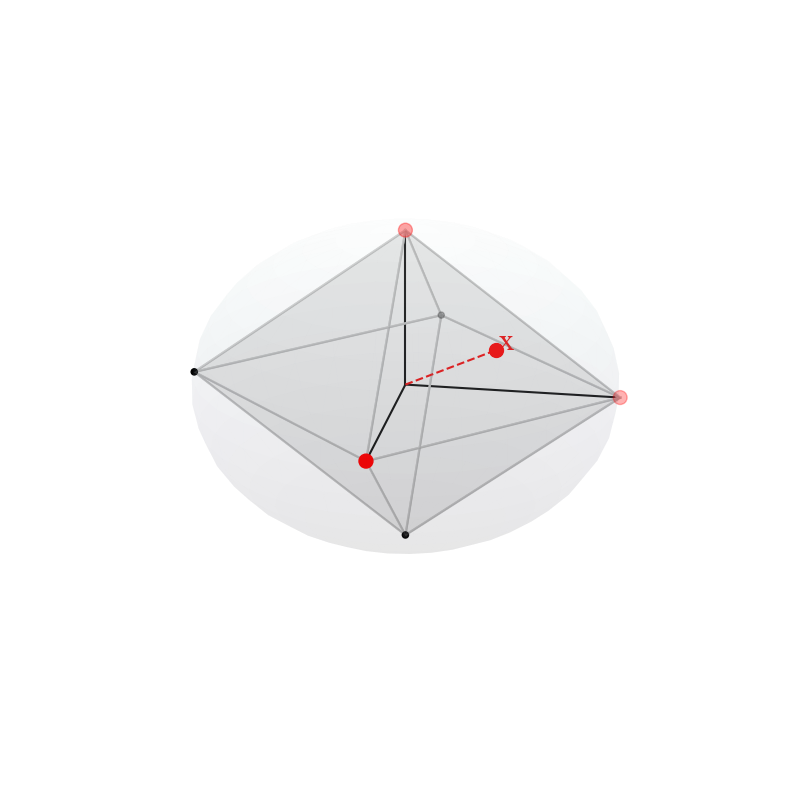

In [9]:

fig = plt.figure(figsize=(10, 10))

r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v) *0.99
y = np.sin(u) * np.sin(v)*0.99
z = np.cos(v)*0.99

ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap = plt.cm.bone, alpha=0.05)

    

#show coordinate system trough center
ax.plot([0,1],[0,0],[0,0],color="black")
ax.plot([0,0],[0,1],[0,0],color="black")
ax.plot([0,0],[0,0],[0,1],color="black")


for facet in true_facets:
    
    point1, point2, point3 = O[facet[0]], O[facet[1]], O[facet[2]]
    
    vertices = [point1, point2, point3]
    
    #add lines
    lines = [[point1,point2],[point2,point3],[point3,point1]]
    
    for line in lines:
        line = np.array(line)
        ax.plot(line[:,0],line[:,1],line[:,2],color="lightgrey")

    ax.add_collection3d(Poly3DCollection([vertices], alpha=0.1,color="grey"))

ax.scatter(O_nonactive[:,0],O_nonactive[:,1],O_nonactive[:,2],color="black")
ax.scatter(p[0],p[1],p[2],color="red",s=100)
ax.plot([0,p[0]],[0,p[1]],[0,p[2]],color="red",linestyle="--")

#turn view
ax.view_init(20, 10)

ax.scatter([1,0,0],[0,1,0],[0,0,1],color="red",s=100)
ax.text(p[0],p[1]+0.01,p[2],"x",color="red")


plt.axis('off')

plt.show()

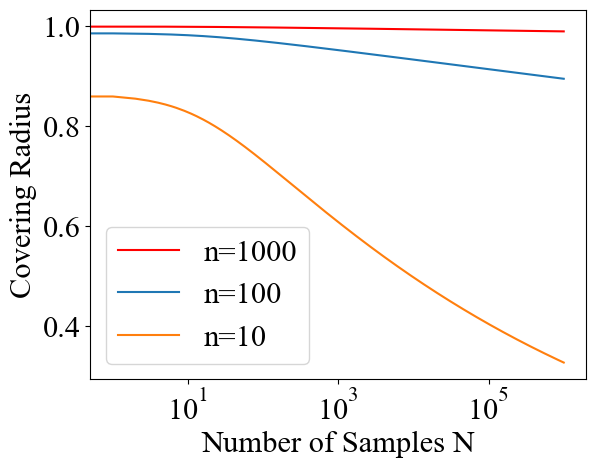

In [4]:
eps1000 = [(np.log(N)/N)**(1/1000) for N in range(10,1000000)]
eps100 = [(np.log(N)/N)**(1/100) for N in range(10,1000000)]
eps10 = [(np.log(N)/N)**(1/10) for N in range(10,1000000)] 
plt.plot(eps1000,label="n=1000",color = "red")
plt.plot(eps100,label="n=100")
plt.plot(eps10,label="n=10")
plt.xlabel("Number of Samples N")
plt.ylabel("Covering Radius")
plt.legend()
plt.xscale("log")
#plt.title("Covering Radius $\epsilon$ as a function of the number of samples N )